In [1]:
from custom_rnn import CustomRNNCell, CustomRNN
import numpy as np
from tinygrad.tensor import Tensor
from tinygrad.nn.optim import Adam
from tinygrad.nn import Linear
from tinygrad.jit import TinyJit
from sparse_regularizer import SparseRegularizer


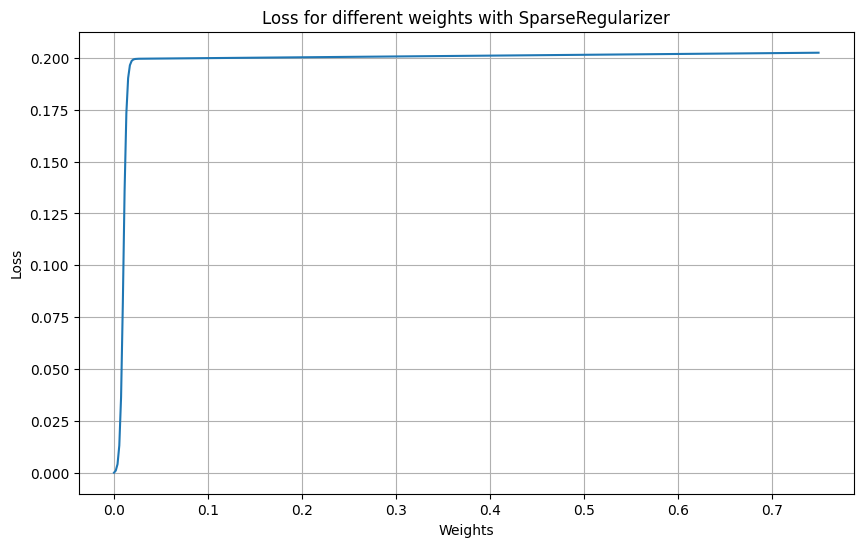

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import json

# initialize the regularizer
reg = SparseRegularizer(intensity=0.1, threshold=0.01, steepness=300, l1=0.004)

# create an array of weight values
weights = np.linspace(0, 0.75, 400)

# initialize an empty list to store the corresponding loss values
loss_values = []

# compute the loss for each weight
for weight in weights:
    weight_tensor = Tensor([weight])
    loss = reg(weight_tensor)
    loss_values.append(loss.numpy().item())
# print(json.dumps([weights[i] for i in range(len(weights))]))
# print(json.dumps([loss_values[i] for i in range(len(loss_values))]))

# plot the results
plt.figure(figsize=(10, 6))
plt.plot(weights, loss_values)
plt.xlabel('Weights')
plt.ylabel('Loss')
plt.title('Loss for different weights with SparseRegularizer')
plt.grid(True)
plt.show()


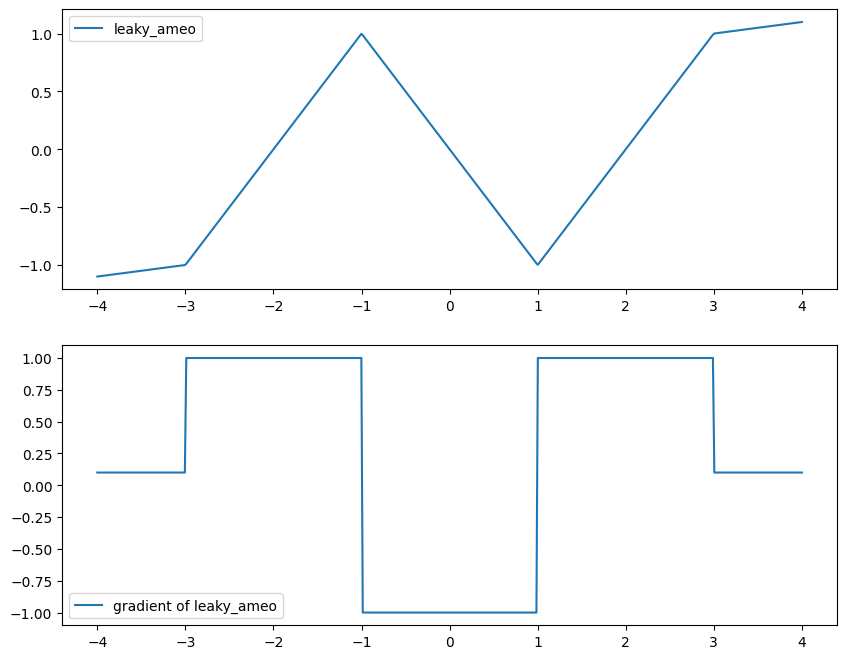

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from ameo_activation import mk_leaky_ameo

LeakyAmeo = mk_leaky_ameo(0.1)

x = Tensor(np.linspace(-4., 4., num=500).astype(np.float32), requires_grad=True)
y = LeakyAmeo.apply(x)
dy_dx = x.mul(0.0).add(1.0)

y.sum().backward()

plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(x.numpy(), y.numpy(), label='leaky_ameo')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(x.numpy(), x.grad.numpy(), label='gradient of leaky_ameo')
plt.legend()

plt.show()


/home/casey/.pyenv/versions/3.10.6/envs/tf-test/lib/python3.10/site-packages/pyopencl/cache.py:417: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  prg.build(options_bytes, [devices[i] for i in to_be_built_indices])


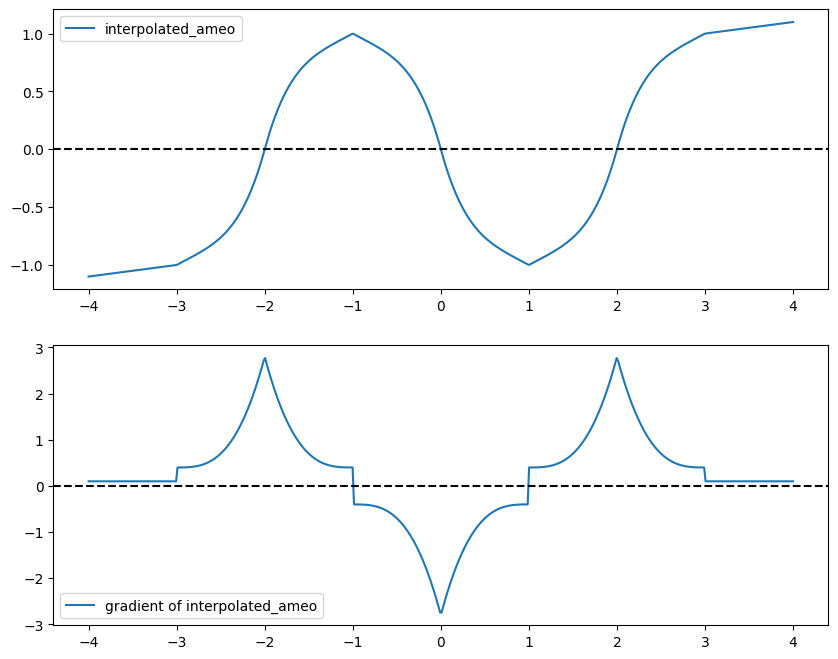

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from ameo_activation import mk_interpolated_ameo

InterpolatedAmeo = mk_interpolated_ameo(0.4, 0.1)

x = Tensor(np.linspace(-4., 4., num=500).astype(np.float32), requires_grad=True)
y = InterpolatedAmeo.apply(x)
dy_dx = x.mul(0.0).add(1.0)

y.sum().backward()

plt.figure(figsize=(10, 8))



plt.subplot(2, 1, 1)
plt.plot(x.numpy(), y.numpy(), label='interpolated_ameo')
plt.legend()

# horizontal line at y = 0
plt.axhline(y=0, color='k', linestyle='--')

plt.subplot(2, 1, 2)
plt.plot(x.numpy(), x.grad.numpy(), label='gradient of interpolated_ameo')
plt.legend()

# horizontal line at y = 0
plt.axhline(y=0, color='k', linestyle='--')

plt.show()